In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

#tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [3]:
from keras.datasets import fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 17s 4us/step


In [8]:
#eploring this data it has 6000
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
 len(train_images)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [13]:
#this has 10000 images with  28 by 28 lpixels
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

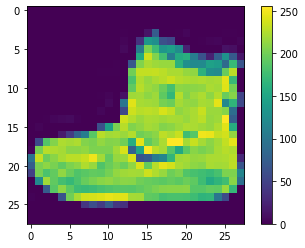

In [15]:
#preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
#the pixels above range from 0 to 255 and we need to make sure they are in the range 0 to 1
train_images = train_images / 255
test_images = test_images / 255

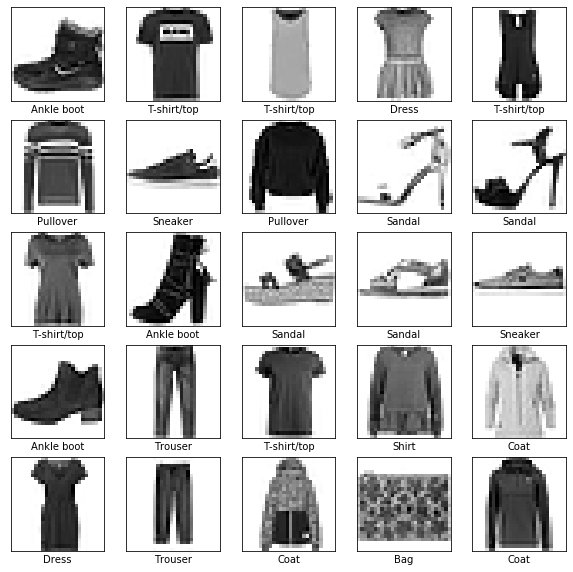

In [22]:
#lets display the first 25 images and if the are correct we are ready to train te neural network
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],  cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [23]:
#build the mode;
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,  activation=tf.nn.relu),
        keras.layers.Dense(10,  activation = tf.nn.softmax)
])

In [24]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
#train  the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.4988 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.3741 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.3348 - acc: 0.8785
Epoch 4/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.3113 - acc: 0.8867
Epoch 5/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.2955 - acc: 0.8908


In [28]:
#accuarcy on the training data is 89% 
#lets evaluate the accuracy with  the test data set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:',  test_acc)

10000/10000 [==============================] - 0s 48us/step
Test accuracy: 0.877


In [29]:
#The test data set is less accurate than the trainig set meaning there is iverfitting in our data set
#predictions
predictions = model.predict(test_images)

In [30]:
predictions[0]

array([2.2923094e-05, 4.4746731e-09, 9.7212319e-07, 1.8719945e-08,
       4.4140603e-07, 8.4805144e-03, 1.1528730e-05, 3.7551239e-02,
       1.1334482e-05, 9.5392102e-01], dtype=float32)

In [31]:
# a prediction is an array of 10 numbers. this describes te confidence o the model that the imge
#corresponds to each o the 10 diffrent articles of clothing. lets se the label tnat has thehighest
#confidence value
np.argmax(predictions[0])

9

In [32]:
class_names[9]

'Ankle boot'

In [33]:
#check for the test label
test_labels[0]

9

In [34]:
predictions[1000]

array([4.2158145e-01, 3.8023267e-05, 9.1726007e-03, 2.1132038e-03,
       5.3323842e-05, 2.8609725e-07, 5.6596619e-01, 4.8176479e-10,
       1.0698064e-03, 5.1080406e-06], dtype=float32)

In [37]:
np.argmax(predictions[6000])

1

In [38]:
#lets plot this data
#we can plot this full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

            

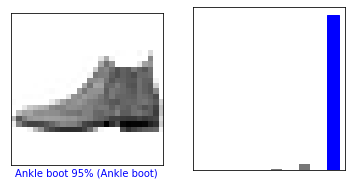

In [39]:
#Let's look at the 0th image, predictions, and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


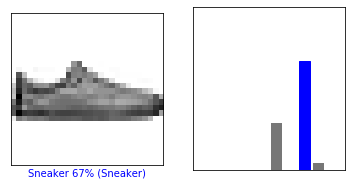

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


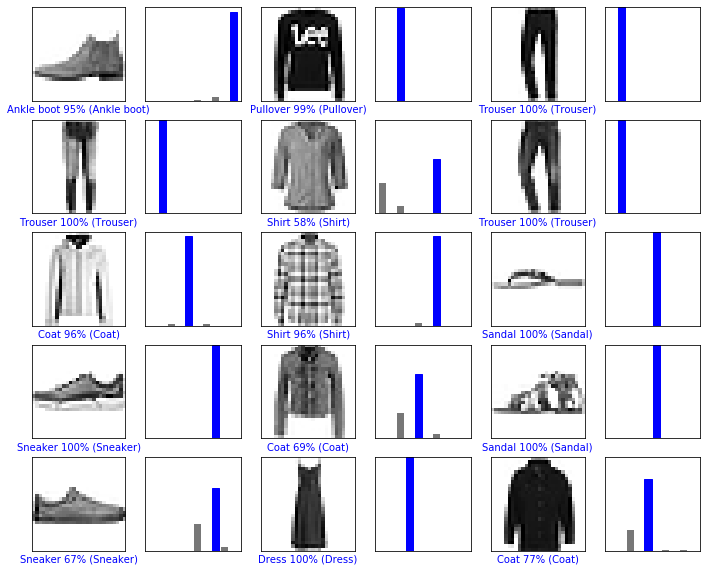

In [41]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [42]:
#Finally, use the trained model to make a prediction about a single image.
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [43]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
#So even though we're using a single image, we need to add it to a list:

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [44]:
#Now predict the image:

predictions_single = model.predict(img)

print(predictions_single)


[[2.2923074e-05 4.4746566e-09 9.7212046e-07 1.8719911e-08 4.4140438e-07
  8.4804911e-03 1.1528709e-05 3.7551172e-02 1.1334440e-05 9.5392114e-01]]


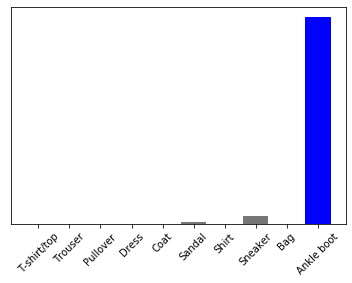

In [45]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [46]:
#model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

prediction_result = np.argmax(predictions_single[0])
print(prediction_result)


9


In [48]:
#as before it return model
history = model.history

In [49]:
history.params

{'batch_size': 32,
 'epochs': 5,
 'steps': None,
 'samples': 60000,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'acc'],
 'validation_steps': None}

In [51]:
history.model

h

In [2]:
import tensorflow as tf
import keras

In [3]:
from tensorflow.keras import backend as k

In [4]:
from PIL import Image

In [6]:
img = Image.open(r'C:\ai\imag\penguin_arade.jpg')

In [12]:
img.load()

In [10]:
import numpy as np

In [11]:
np.asarray(img)

array([[[ 85,  97, 119],
        [ 88,  99, 121],
        [ 91,  99, 122],
        ...,
        [117, 136, 151],
        [119, 136, 154],
        [121, 136, 157]],

       [[ 86,  93, 119],
        [ 92,  98, 124],
        [ 95, 101, 127],
        ...,
        [126, 143, 159],
        [123, 140, 158],
        [121, 138, 156]],

       [[ 94, 100, 122],
        [ 99, 104, 126],
        [101, 106, 128],
        ...,
        [129, 146, 162],
        [127, 144, 160],
        [125, 143, 157]],

       ...,

       [[ 59,  51,  32],
        [ 73,  61,  39],
        [ 56,  38,  16],
        ...,
        [161, 111,  14],
        [223, 156,  77],
        [219, 152,  71]],

       [[ 84,  67,  49],
        [ 95,  74,  55],
        [ 87,  62,  42],
        ...,
        [211, 146,  62],
        [255, 173,  73],
        [243, 162,  73]],

       [[ 71,  53,  33],
        [ 74,  52,  31],
        [ 78,  50,  29],
        ...,
        [252, 176, 100],
        [241, 139,  28],
        [209, 110,  16]]

In [13]:
img.size

(640, 424)

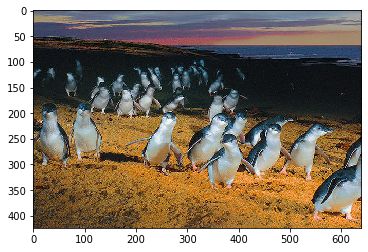

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)

In [17]:
from keras import backend

In [18]:
print(backend.image_data_format())

channels_last


In [21]:
img = Image.open(r'C:\ai\imag\penguin_arade.jpg')

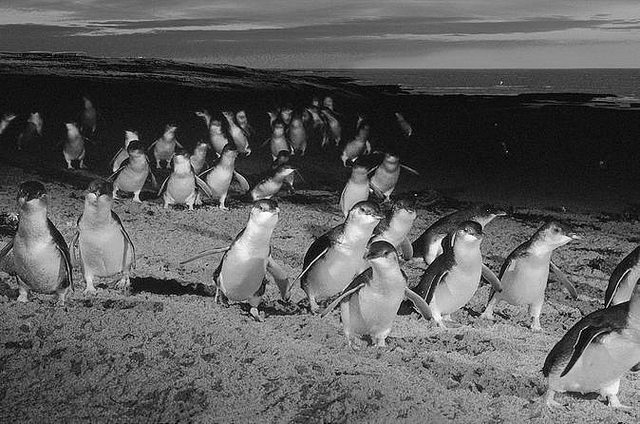

In [22]:
#convwrt this image to gray scale
img  = img.convert(mode='L')
img.load()
img

In [23]:
#convert it into arrays
data = np.asarray(img)
print(data.shape)

(424, 640)


In [25]:
#add channels first
data_first = np.expand_dims(data, axis=0) 
print(data_first.shape)

(1, 424, 640)


In [26]:
#add channels last
data_last = np.expand_dims(data,  axis=2)
print(data_last.shape)

(424, 640, 1)


In [28]:
#another option is to us this format
data_reshape = np.reshape(data, (424,640,1))
print(data_reshape.shape)
#or data.reshape((424, 640, 1))

(424, 640, 1)


In [33]:
#changing channel ordering
#i.e from [rows][columns][channel] to [channel][rows][columns]
#change channels from first to last
data = np.moveaxis(data, 2, 0)
print(data.shape)

(640, 1, 424)


In [34]:
data = np.moveaxis(data, 0, 2)
print(data.shape)

(1, 424, 640)


[[[ 86 133 177]
  [ 85 132 176]
  [ 84 133 176]
  ...
  [ 94 128 153]
  [ 91 128 155]
  [ 94 129 169]]

 [[ 86 133 177]
  [ 88 135 179]
  [ 88 137 180]
  ...
  [ 96 133 159]
  [ 92 136 165]
  [ 99 141 183]]

 [[ 83 130 174]
  [ 87 134 178]
  [ 89 138 181]
  ...
  [108 150 175]
  [100 149 179]
  [ 97 144 186]]

 ...

 [[127  77  76]
  [131  81  80]
  [128  80  76]
  ...
  [  4  10  10]
  [  2  11  10]
  [  2  11  10]]

 [[132  81  77]
  [129  80  75]
  [124  75  70]
  ...
  [  4  10  10]
  [  3  12  11]
  [  3  12  11]]

 [[140  90  83]
  [137  87  80]
  [130  81  74]
  ...
  [ 11  17  17]
  [ 10  19  18]
  [ 10  19  18]]]


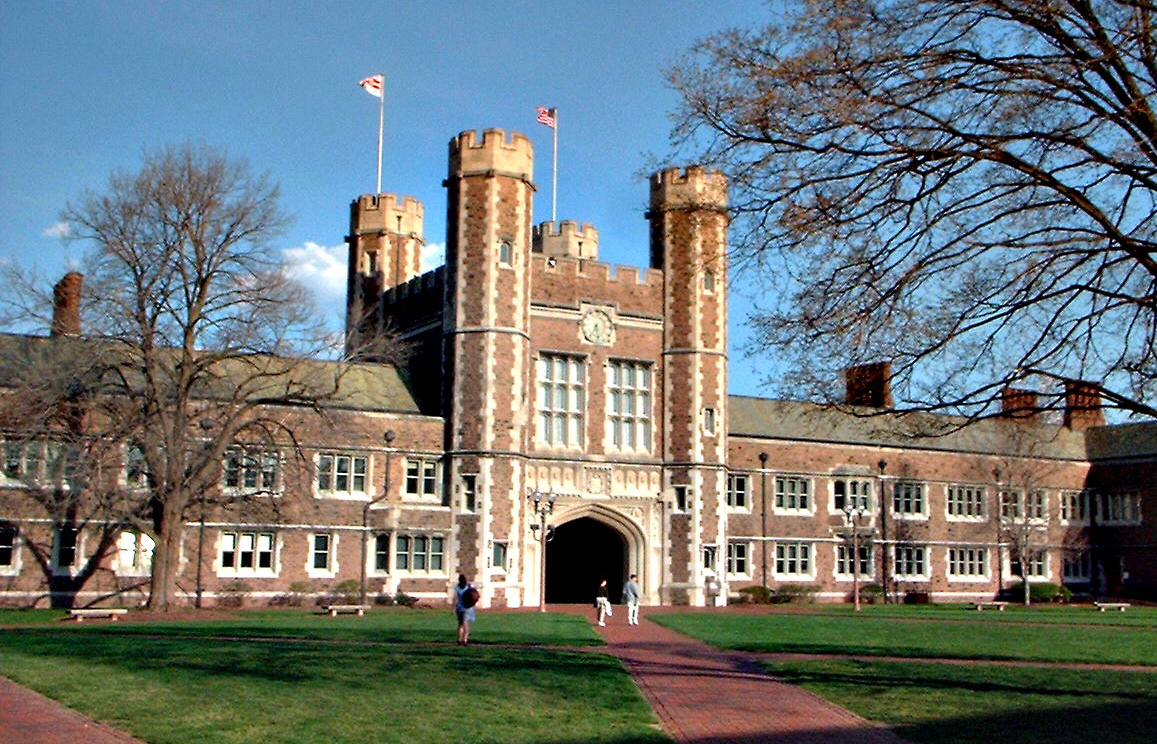

In [19]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

%matplotlib inline

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

print(np.asarray(img))

img

In [1]:
import tensorflow
import keras

Using TensorFlow backend.


In [2]:
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

data = np.array([[i] for i in range(50)])
targets = np.array([[i] for i in range(50)])

data_gen = TimeseriesGenerator(data, targets,
                               length=10, sampling_rate=2,
                               batch_size=2)
assert len(data_gen) == 20

batch_0 = data_gen[0]
x, y = batch_0
assert np.array_equal(x,
                      np.array([[[0], [2], [4], [6], [8]],
                                [[1], [3], [5], [7], [9]]]))
assert np.array_equal(y,
                      np.array([[10], [11]]))